In [19]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("./data/Cardetails.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Missing Data

In [4]:
null_features = [feature for feature in df.columns if df[feature].isnull().sum() > 1]
for feature in null_features:
    print(f"{feature} : {np.round(df[feature].isnull().mean(), 4)}% missing values")

mileage : 0.0272% missing values
engine : 0.0272% missing values
max_power : 0.0265% missing values
torque : 0.0273% missing values
seats : 0.0272% missing values


percentage of values missing is negligible and its okay to remove these records

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(7906, 13)

## Check for duplicates

In [7]:
df.duplicated().sum()

np.int64(1189)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(6717, 13)

In [10]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


#### dropping torque column 

In [11]:
df = df.drop(columns=["torque"], axis=1)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [12]:
for feature in df.columns:
    print(f"Unique values of {feature}")
    print(f"{df[feature].unique()}, total unique values: {len(df[feature].unique())}")
    print("-------------")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], total unique values: 1982
-------------
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996], total unique values: 27
-------------
Unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   7

we can see that the names of the car is preceded by its maker's name

In [13]:
def get_brand(name):
    brand = name.split(' ')[0]
    return brand

def get_mileage(value):
    mil = value.split(' ')[0]
    return mil

def get_power(value):
    power = value.split(' ')[0]
    return power

def get_CC(value):
    cc = value.split(' ')[0]
    return cc


In [14]:
df["name"] = df["name"].apply(get_brand)
df["mileage"] = df["mileage"].apply(get_brand)
df["max_power"] = df["max_power"].apply(get_brand)
df["engine"] = df["engine"].apply(get_brand)

In [15]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0


In [16]:
df = pd.get_dummies(df, columns=["fuel", "transmission", "seller_type"])
df.head()

,name,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti,2014,450000,145500,First Owner,23.4,1248,74,5.0,False,True,False,False,False,True,False,True,False
1,Skoda,2014,370000,120000,Second Owner,21.14,1498,103.52,5.0,False,True,False,False,False,True,False,True,False
2,Honda,2006,158000,140000,Third Owner,17.7,1497,78,5.0,False,False,False,True,False,True,False,True,False
3,Hyundai,2010,225000,127000,First Owner,23.0,1396,90,5.0,False,True,False,False,False,True,False,True,False
4,Maruti,2007,130000,120000,First Owner,16.1,1298,88.2,5.0,False,False,False,True,False,True,False,True,False


Encoding name, owner using label encoder

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
name_data = encoder.fit_transform(df['name'])
owner_data = encoder.fit_transform(df['owner'])
df["name"] = name_data
df["owner"] = owner_data

In [18]:
df.head()

,name,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,20,2014,450000,145500,0,23.4,1248,74,5.0,False,True,False,False,False,True,False,True,False
1,26,2014,370000,120000,2,21.14,1498,103.52,5.0,False,True,False,False,False,True,False,True,False
2,10,2006,158000,140000,4,17.7,1497,78,5.0,False,False,False,True,False,True,False,True,False
3,11,2010,225000,127000,0,23.0,1396,90,5.0,False,True,False,False,False,True,False,True,False
4,20,2007,130000,120000,0,16.1,1298,88.2,5.0,False,False,False,True,False,True,False,True,False


In [91]:
df[df.columns] = df[df.columns].astype(float)
df.head()

,name,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,20.0,2014.0,450000.0,145500.0,0.0,23.40,1248.0,74.00,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,26.0,2014.0,370000.0,120000.0,2.0,21.14,1498.0,103.52,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,10.0,2006.0,158000.0,140000.0,4.0,17.70,1497.0,78.00,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,11.0,2010.0,225000.0,127000.0,0.0,23.00,1396.0,90.00,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,20.0,2007.0,130000.0,120000.0,0.0,16.10,1298.0,88.20,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## Scaling data 

In [20]:
feature_scale = [feature for feature in df.columns if feature not in ['selling_price']]
scaler = MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [23]:
df = pd.concat([df[['selling_price']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)
df

,selling_price,name,year,km_driven,owner,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,450000,0.666667,0.769231,0.061640,0.00,0.557143,0.209396,0.112200,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,370000,0.866667,0.769231,0.050837,0.50,0.503333,0.293289,0.192593,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,158000,0.333333,0.461538,0.059310,1.00,0.421429,0.292953,0.123094,0.25,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,225000,0.366667,0.615385,0.053803,0.00,0.547619,0.259060,0.155773,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,130000,0.666667,0.500000,0.050837,0.00,0.383333,0.226174,0.150871,0.25,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,260000,0.666667,0.730769,0.021182,0.50,0.450000,0.125503,0.093410,0.25,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6713,475000,0.366667,0.769231,0.033891,0.50,0.536667,0.259060,0.152315,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6714,320000,0.366667,0.730769,0.046601,0.00,0.440476,0.192282,0.136302,0.25,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6715,135000,0.366667,0.500000,0.050414,0.25,0.400000,0.291611,0.210240,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Trying out lasso for feature selection

In [30]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
X = df.drop(columns=['selling_price'])
y = df["selling_price"]
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [31]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True])

Every feature except transmission_Manual seems important for predicting the result

## Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## Linear Regression

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
pred = model.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test,pred))
rmse

272999.34355417785

### Getting Rsquared value

In [33]:
model.score(X_test, y_test)

0.6603546533147446

In [35]:
model.coef_

array([ 4.25920565e+04,  9.11525750e+05, -1.45008865e+06, -5.56552562e+04,
        1.47138969e+05,  1.83711506e+05,  3.16830933e+06, -5.24425441e+04,
       -3.35807335e+04,  3.04699584e+03,  8.90850582e+04, -5.85513206e+04,
        1.67126414e+05, -1.67126414e+05,  1.01056454e+05, -1.99095292e+04,
       -8.11469245e+04])

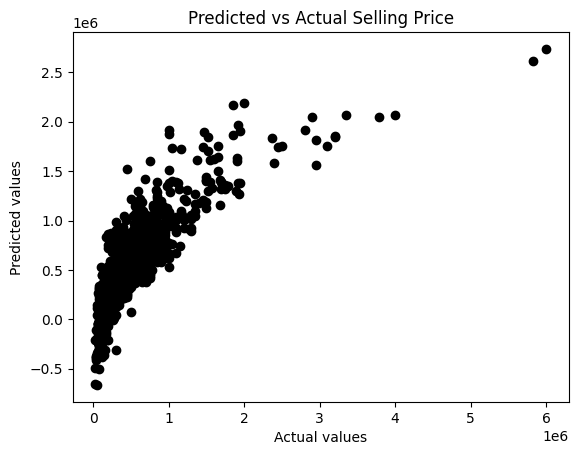

In [38]:
plt.scatter(y_test, pred, color="black")
#plt.plot(X_test, pred, color="blue", linewidth=3)
#plt.plot(y_test, pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual Selling Price")
plt.show()

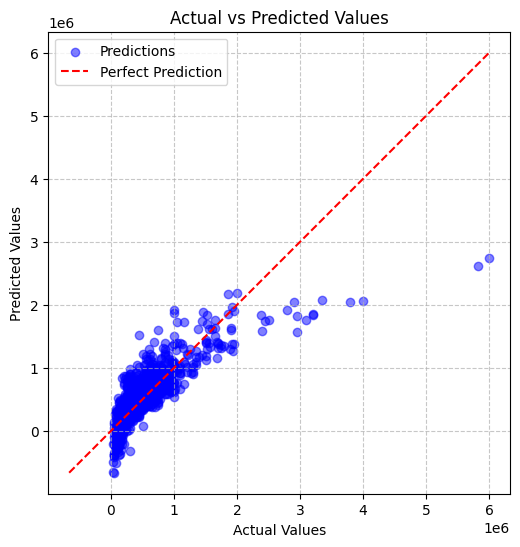

In [39]:
def plot_actual_vs_predicted(y_true, y_pred):
    """
    Create a scatter plot of actual vs predicted values with a regression line
    
    Parameters:
    y_true: array-like, actual values
    y_pred: array-like, predicted values
    """
    
    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, c='blue', alpha=0.5, label='Predictions')
    
    # Add the perfect prediction line
    # Get the range of values to plot the line
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    line_vals = np.linspace(min_val, max_val, 100)
    plt.plot(line_vals, line_vals, 'r--', label='Perfect Prediction')
    
    # Customize the plot
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    
    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Make the plot square
    plt.axis('square')
    
    # Show the plot
    plt.show()

plot_actual_vs_predicted(y_test, pred)